In [75]:
from langgraph.graph import StateGraph , START , END
from typing import TypedDict, Annotated
from dotenv import load_dotenv
load_dotenv()
from langchain_openai import ChatOpenAI
from langchain_core.messages import BaseMessage , HumanMessage
from langgraph.checkpoint.memory import MemorySaver

In [ ]:
from langgraph.graph.message import add_messages
class ChatState(TypedDict):
    messages: Annotated[list[BaseMessage] , add_messages]   # basemessage means it can be  either human or ai message or system message #add message is reducer 
    
    

In [67]:
llm = ChatOpenAI(model='gpt-4')

def chat_node(state: ChatState):
    messages = state['messages']
    response = llm.invoke(messages)
    
    return {"messages": [response]} 



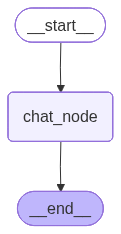

In [76]:
checkpointer = MemorySaver()

graph = StateGraph(ChatState)



#add nodes
graph.add_node('chat_node',chat_node)

#add edges
graph.add_edge(START , 'chat_node')
graph.add_edge('chat_node' , END)

chatbot = graph.compile(checkpointer=checkpointer)
chatbot

In [69]:
initial_state = {'messages':[HumanMessage(content='What is the capital city of Nepal')]}
result = chatbot.invoke(initial_state)
result['messages'][-1].content

'The capital city of Nepal is Kathmandu.'

In [77]:
# thread is one interaction with chatbot
thread_id = "1"

while True:
    user_message = input("Type here : ")
    print("User Message:", user_message)
    if user_message.strip().lower() in ["exit", "quit", "bye"]:
        break

    config = {"configurable": {"thread_id": thread_id}}

    response = chatbot.invoke({"messages": [HumanMessage(content=user_message)]},config=config)
    print("AI : ", response["messages"][-1].content)

User Message: hi
AI :  Hello! How can I assist you today?
User Message: my name is pratik
AI :  Nice to meet you, Pratik! How can I assist you today?
User Message: what is my name
AI :  Your name is Pratik.
User Message: how do you know
AI :  You just told me a few moments ago that your name is Pratik.
User Message: how do have memory
AI :  As an AI developed by OpenAI, I don't actually have a memory in the same way humans do. I don't retain information from one interaction to the next for privacy reasons. However, within a single conversation, I can refer back to information previously mentioned.
User Message: bye


In [78]:
chatbot.get_state(config=config)

StateSnapshot(values={'messages': [HumanMessage(content='hi', additional_kwargs={}, response_metadata={}, id='bd99f5db-68c7-4311-b101-6291c99c26cc'), AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4-0613', 'system_fingerprint': None, 'id': 'chatcmpl-CPRYNuCjiqb8GCtlEFfbHGNG7WTff', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--0da06aab-c3e1-4f3f-903e-9344e576bdd6-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}), HumanMessage(content='my name is pratik', 